# Bayesian Linear Regression

### Recall Linear Regression:

Let $\phi(x)$ be the set of basis functions, and $w$ the set of parameters. It is common to add a bias by letting $\phi_0 = 1$. We have
$$y(x,w) = w^T\phi(x),$$

where $y$ is our linear model (linear in $w$).

### Recall Maximum likelihood and least squares:

We assume that the target variable $t$ is given by a deterministic function $y(x,w)$ with additive Gaussian noise: 
$$t = y + \epsilon,$$

Where $\epsilon = \mathcal{N}(0,\beta^{-1})$. We thus have 
$$p(t|x,w,\beta) = \mathcal{N}(t|y(x,w),\beta^{-1}).$$

Recall that, if we assume a squared loss function, then the optimal prediction, for a new value of $x$, will be given by the conditional mean of the target variable. In the case of a Gaussian conditional distribution of this form, the conditional mean will be simply 

$$\mathbb{E}[t|x] = \int tp(t|x)dt = y(x,w).$$ 

Observe that Gaussian noise implies unimodal dristibution ("one peak"). For a set of $t_1,...,t_N$, and $x_1,...x_N$, we can find the maximum likelihood to determine $w$ and $\beta$. The solution is easy to find by setting the dragient to 0, and gives (if solved just for $w_0$ you can easily see that the bias will just be the difference between the mean of the training set and the weighted sum of the means of the basis functions):
$$w_{ML} = (\Phi^T\Phi)^{-1}\Phi^Tt,$$
where $\Phi$ is called the design matrix $\Phi_{nj} = \phi_j(x_n)$. The quantity
$$\Phi^{\dagger} = (\Phi^T\Phi)^{-1}\Phi^T$$
is called the Moore-Penrose pseudo-inverse of $\Phi$. One can also maximize the log likelihood with respect to the noise:
$$\frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n=1}^N[t_n - w_{ML}^T\phi(x_n)]^2$$
If we were to add a simple regularizer
$$\frac{1}{2}\sum_{n=1}^N[t_n - w^T\phi(x_n)]^2 + \frac{\lambda}{2}w^Tw,$$

We would get:
$$w = (\lambda + \Phi^T\Phi)^{-1}\Phi t

## Bayesian Linear Regression

With $\beta$ constant, let 
$$p(w) = \mathcal{N}(w|m_0,S_0)$$
The posterior will be 
$$p(w|t) = \mathcal{N}(w|m_N,S_N)$$
where
$$m_N = S_N(S_0^{-1}m_0 + \beta\Phi^Tt)$$
$$S_N^{-1} = S_0^{-1} + \beta\Phi^T\Phi$$
Then the maximum posterior weight is simply given by $w_{MAP} = m_N$.
Note that if we consider an infinitely broad prior $S_0$, the mean $m_N$ of the posterior distribution reduces to the maximum likelihood value $w_{ML}$. The proof of the result above is given next.

Let 
$$p(x) = \mathcal{N}(x|\mu,\Lambda^{-1})\\
p(y|x) = \mathcal{N}(y|Ax + b,L^{-1})$$
First we find an expression for the joint distribution over c and y. Tod do this, we define 
$$z = \begin{pmatrix}
x\\
y\\
\end{pmatrix}$$
and we consider the log of the joint distribution ($\frac{p(x,y)}{p(x)} = p(y|x)$)
$$ln(p(z)) = ln(p(x)) + ln(p(y|x))\\
= -\frac{1}{2}(x-\mu)^T\Lambda(x-\mu)\\
-\frac{1}{2}(y- Ax - b)^TL(y - Ax - b) + const$$
We see taht z is a quadratic function.. we can complete squares to find that
$$-\frac{1}{2}x^T(\Lambda + A^TLA)x - \frac{1}{2}y^TLy + \frac{1}{2}y^TLAx + \frac{1}{2}x^TA^TLy\\
= -\frac{1}{2}
\begin{pmatrix}
x\\
y\\
\end{pmatrix}^T
\begin{pmatrix}
  \Lambda + A^TLA       & -A^TL\\
  -LA       & L\\
\end{pmatrix}
\begin{pmatrix}
x\\
y\\
\end{pmatrix} = -\frac{1}{2}z^TRz$$
Where
$$
R = \begin{pmatrix}
  \Lambda + A^TLA       & -A^TL\\
  -LA       & L\\
\end{pmatrix}\\
R^{-1} = \begin{pmatrix}
  \Lambda^{-1}       & \Lambda^{-1}A^T\\
  -A\Lambda^{-1}       & L^{-1} + A\Lambda^{-1}A^T\\
\end{pmatrix}\\$$
By identifying the linear term we get 
$$x^T\Lambda\mu - x^TA^TLb + y^TLb = \begin{pmatrix}
x\\
y\\
\end{pmatrix}^T
\begin{pmatrix}
  \Lambda\mu - A^TLb\\
  Lb       
\end{pmatrix}\\$$
The mean will be given by 
$$\mathbb{E}[z] = R^{-1}\begin{pmatrix}
  \Lambda\mu - A^TLb\\
  Lb       
\end{pmatrix} = \begin{pmatrix}
  \mu\\
  A\mu + b       
\end{pmatrix}$$
where the squared term we just add as a constant.
From this we have that for the marginal $p(y)$ we have 
$$\mathbb{E}[y] = A\mu + b\\
cov[y] = L^{-1} + A\Lambda^{-1}A^T$$

By doing a similar procedure of finding quadratic and linear terms is easy to see that for a joint Gaussian $\mathcal{N}(x|\mu,\Sigma)$ with $\Lambda = \Sigma^{-1}$ and 
$$x = \begin{pmatrix}
  x_a\\
  x_b       
\end{pmatrix},   \mu = \begin{pmatrix}
  \mu_a\\
  \mu_b       
\end{pmatrix}\\
\\
\\
\Sigma = 
\begin{pmatrix}
  \Sigma_{aa} & \Sigma_{ab}\\
  \Sigma_{ba} & \Sigma_{bb}      
\end{pmatrix}, \Lambda = 
\begin{pmatrix}
  \Lambda_{aa} & \Lambda_{ab}\\
  \Lambda_{ba} & \Lambda_{bb}      
\end{pmatrix}$$
we have 
$$p(x_{a}|x_{b}) = \mathcal{N}(x|\mu_{a|b}, \Lambda^{-1}_{aa})\\
\mu_{a|b} = \mu_a - \Lambda_{aa}^{-1}\Lambda_{ab}(x_b - \mu_b)\\
\Sigma_{a|b} = \Sigma_{aa} - \Sigma_{ab}\Sigma^{-1}_{bb}\Sigma_{ba}\\
p(x_a) = \mathcal{N}(x_a|\mu_a,\Sigma_{aa})$$
We can use this result on or previous calculation to find that:
$$\mathbb{E}[x|y] = (\Lambda + A^TLA)^{-1}(A^TL(y-b) + \Lambda\mu)\\
cov[x|y] = (\Lambda + A^TLA)^{-1}$$
Now if we identify that
$$\Lambda = S_0^{-1},\quad    L = I\beta, \quad \mu = m_0,\quad cov = S_N, \quad A = \Phi (without bias), \quad y - b = t\quad x = w$$

this is exactly what we claimed before 
$$S_N^{-1} = S_0^{-1} + \beta\Phi^T\Phi\\
m_N = S_N(S_0^{-1}m_0 + \beta\Phi^Tt)$$

## Implementation

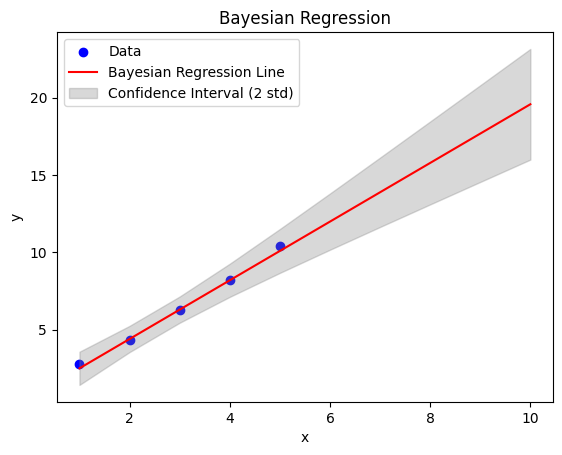

In [50]:
import numpy as np
import matplotlib.pyplot as plt 
import random

# Observed data
x = np.array([1, 2, 3, 4, 5])
y = np.array(list(map(lambda y: y + random.random(), [2, 4, 6, 8, 10])))

# Design matrix
X = np.vstack((x, np.ones(len(x)))).T #simple x + b

# Prior assumptions
prior_mean = np.zeros(2)  # Assume zero mean for slope and intercept
prior_cov = np.eye(2)  # Assume identity covariance for simplicity

# Compute posterior parameters
posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + X.T @ X)
posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + X.T @ y)

# Generate new x-values for prediction
x_pred = np.array([1, 2, 3, 4, 5,6, 7, 8, 9, 10])

# Compute predicted y-values
X_pred = np.vstack((x_pred, np.ones(len(x_pred)))).T
y_pred_mean = X_pred @ posterior_mean
y_pred_std = np.sqrt(np.sum(X_pred @ posterior_cov * X_pred, axis=1))

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_pred, y_pred_mean, color='red', label='Bayesian Regression Line')
plt.fill_between(x_pred, y_pred_mean - 2 * y_pred_std, y_pred_mean + 2 * y_pred_std,
                 color='gray', alpha=0.3, label='Confidence Interval (2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression')
plt.legend()
plt.show()

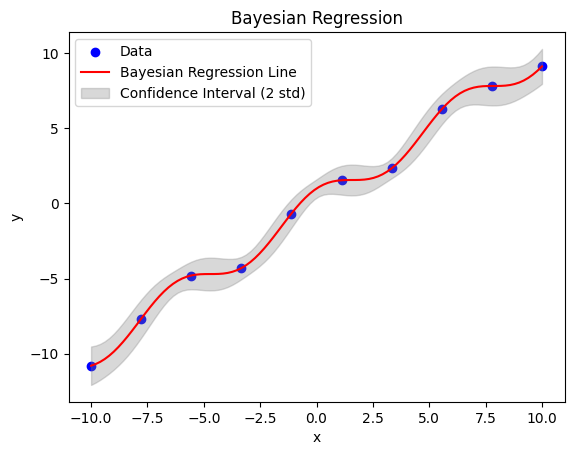

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
x = np.linspace(-10,10,10)
y = np.cos(x) + x

# Design matrix
X = np.vstack((np.cos(x) + x, np.sin(x), np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(3)  # Assume zero mean for cosine amplitude, frequency, and intercept
prior_cov = np.eye(3)  # Assume identity covariance for simplicity

# Compute posterior parameters
posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + X.T @ X)
posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + X.T @ y)

# Generate new x-values for prediction
x_pred = np.linspace(-10, 10, 100)

# Compute predicted y-values and uncertainty bounds
X_pred = np.vstack((np.cos(x_pred) + x_pred, np.sin(x_pred), np.ones(len(x_pred)))).T
y_pred_mean = X_pred @ posterior_mean
y_pred_std = np.sqrt(np.sum(X_pred @ posterior_cov * X_pred, axis=1))

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_pred, y_pred_mean, color='red', label='Bayesian Regression Line')
plt.fill_between(x_pred, y_pred_mean - 2 * y_pred_std, y_pred_mean + 2 * y_pred_std,
                 color='gray', alpha=0.3, label='Confidence Interval (2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression')
plt.legend()
plt.show()


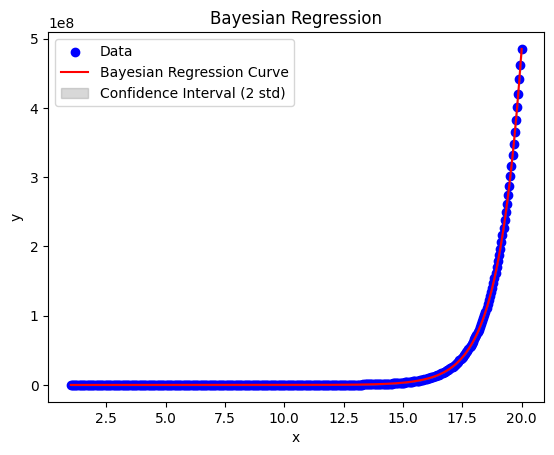

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
x = np.linspace(1,20,400)
# y = np.array([1.0, 0.5, 0.333, 0.25, 0.2])
y = np.exp(x) + 1/x

# Design matrix
X = np.vstack((np.exp(x) + 1/x, np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(2)  # Assume zero mean for coefficient and intercept
prior_cov = np.eye(2)  # Assume identity covariance for simplicity

# Compute posterior parameters
posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + X.T @ X)
posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + X.T @ y)

# Generate new x-values for prediction
x_pred = np.linspace(1,20,1000)

# Compute predicted y-values and uncertainty bounds
X_pred = np.vstack((np.exp(x_pred) + 1/x_pred, np.ones(len(x_pred)))).T
y_pred_mean = X_pred @ posterior_mean
y_pred_std = np.sqrt(np.sum(X_pred @ posterior_cov * X_pred, axis=1))

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_pred, y_pred_mean, color='red', label='Bayesian Regression Curve')
plt.fill_between(x_pred, y_pred_mean - 2 * y_pred_std, y_pred_mean + 2 * y_pred_std,
                 color='gray', alpha=0.3, label='Confidence Interval (2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression')
plt.legend()
plt.show()


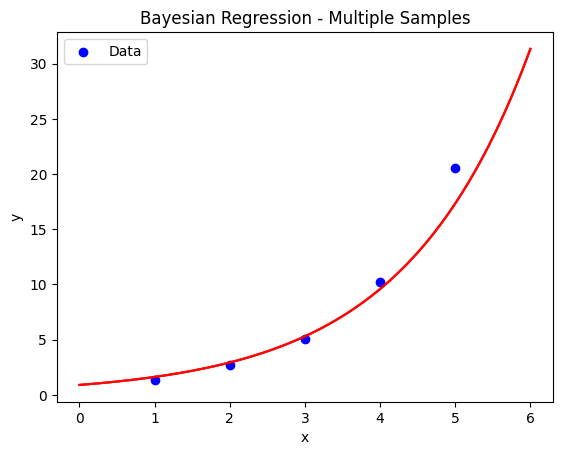

In [426]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.3, 2.7, 5.1, 10.2, 20.5])

# Design matrix
X = np.vstack((x, np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(2)  # Assume zero mean for coefficient and intercept
prior_cov = np.eye(2)  # Assume identity covariance for simplicity

# Number of samples from posterior
num_samples = 10

# Generate new x-values for prediction
x_pred = np.linspace(0, 6, 100)

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')

# Sample from the posterior and plot regression curves
for _ in range(num_samples):
    # Compute posterior parameters
    posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + X.T @ X)
    posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + X.T @ np.log(y))

    # Compute predicted y-values
    X_pred = np.vstack((x_pred, np.ones(len(x_pred)))).T
    y_pred_mean = np.exp(X_pred @ posterior_mean)

    # Plot regression curve
    plt.plot(x_pred, y_pred_mean, color='red', alpha=0.3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression - Multiple Samples')
plt.legend()
plt.show()


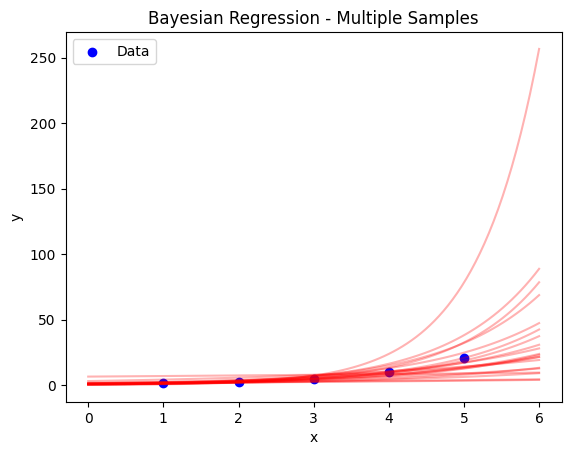

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.3, 2.7, 5.1, 10.2, 20.5])

# Design matrix
X = np.vstack((x, np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(2)   # Assume zero mean for coefficient and intercept
prior_cov = np.eye(2)  # Assume identity covariance for simplicity

# Number of samples from posterior
num_samples = 20

# Generate new x-values for prediction
x_pred = np.linspace(0, 6, 100)

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')

# Sample from the posterior and plot regression curves
for _ in range(num_samples):
    # Sample regression parameters from the posterior distribution
    posterior_samples = np.random.multivariate_normal(posterior_mean, posterior_cov)

    # Compute predicted y-values
    X_pred = np.vstack((x_pred, np.ones(len(x_pred)))).T
    y_pred_mean = np.exp(X_pred @ posterior_samples)

    # Plot regression curve
    plt.plot(x_pred, y_pred_mean, color='red', alpha=0.3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression - Multiple Samples')
plt.legend()
plt.show()
